# Questão do Livro 2.6

## 2.6.a

Determine the price and the advertising budget that will maximize profit. Use the five-step method. Model as a constrained optimization problem, and solve using the method of Lagrange multipliers.


In [1]:
from sympy import solve, var, symbols, diff, N, simplify, Eq
from sympy.plotting import plot, plot3d

In [2]:
d = var('d', real=True)
m = var('m', real=True)

c = 700
p = 950 - 100*d
t = (10000 + 200*m)*(1+0.5*d)
#t = 10000 + 200*m + 5000*d

C = c * t
P = 50000 + 10000*m
R = t * p

L = R - P - C
L

-10000*m + (950 - 100*d)*(0.5*d + 1)*(200*m + 10000) - 700*(0.5*d + 1)*(200*m + 10000) - 50000

In [3]:
print("Lucro normal")
L.subs({d: 0, m: 0})

Lucro normal


2450000

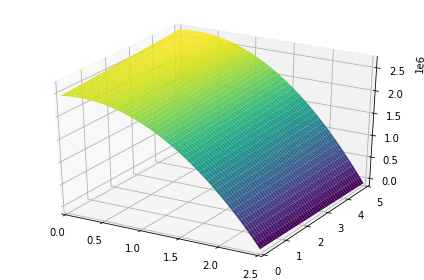

In [4]:
#plot3d(L)
plot3d(L, (d, 0, 2.5), (m, 0, 5))

### Otimização sem restrição

Por favor ignorar e ir para a próxima seção.

In [5]:
simplify(L)

-10000.0*d**2*m - 500000.0*d**2 + 5000.0*d*m + 250000.0*d + 40000.0*m + 2450000.0

In [6]:
dLdd = diff(L, d)
simplify(dLdd)

-20000.0*d*m - 1000000.0*d + 5000.0*m + 250000.0

In [7]:
dLdm = diff(L, m)
simplify(dLdm)

-10000.0*d**2 + 5000.0*d + 40000.0

In [8]:
s = solve([dLdd, dLdm], [d, m], dict=True)
s

[{d: -1.76556443707464, m: -50.0000000000000},
 {d: 2.26556443707464, m: -50.0000000000000}]

In [9]:
L.subs(s[-1])

450000.000000002

### Otimização com restrição

In [10]:
mu = symbols('mu', real = True)

lagrange = L - mu * (5 - m)
lagrange

-10000*m - mu*(5 - m) + (950 - 100*d)*(0.5*d + 1)*(200*m + 10000) - 700*(0.5*d + 1)*(200*m + 10000) - 50000

In [11]:
grads = diff(lagrange, d), diff(lagrange, m), diff(lagrange, mu)

In [12]:
simplify(grads[0])

-20000.0*d*m - 1000000.0*d + 5000.0*m + 250000.0

In [13]:
simplify(grads[1])

-10000.0*d**2 + 5000.0*d + 1.0*mu + 40000.0

In [14]:
simplify(grads[2])

m - 5

In [15]:
s2 = solve(grads, [d, m, mu], dict=True)
s2

[{d: 0.250000000000000, m: 5.00000000000000, mu: -40625.0000000000}]

In [16]:
lagrange.subs(s2[0])

2684375.00000000

## 2.6.b

Determine the sensitivity of the decision variables (price and advertising) to price elasticity (the 50\% number).


In [17]:
d = var('d', real=True)
m = var('m', real=True)
a = var('a', real=True)

c = 700
p = 950 - 100*d
t = (10000 + 200*m)*(1+a*d)
#t = 10000 + 200*m + 5000*d

C = c * t
P = 50000 + 10000*m
R = t * p

L = R - P - C
L

-10000*m + (950 - 100*d)*(200*m + 10000)*(a*d + 1) - 700*(200*m + 10000)*(a*d + 1) - 50000

In [18]:
mu = symbols('mu', real = True)

lagrange = L - mu * (5 - m)
lagrange

-10000*m - mu*(5 - m) + (950 - 100*d)*(200*m + 10000)*(a*d + 1) - 700*(200*m + 10000)*(a*d + 1) - 50000

In [19]:
grads = diff(lagrange, d), diff(lagrange, m), diff(lagrange, mu)
grads

(a*(950 - 100*d)*(200*m + 10000) - 700*a*(200*m + 10000) + (200*m + 10000)*(-100*a*d - 100),
 -140000*a*d + mu + 200*(950 - 100*d)*(a*d + 1) - 150000,
 m - 5)

In [20]:
simplify(grads[0])

-10000*(m + 50)*(2*a*d + a*(2*d - 19) + 14*a + 2)

In [21]:
simplify(grads[1])

-20000*a*d**2 + 50000*a*d - 20000*d + mu + 40000

In [22]:
simplify(grads[2])

m - 5

In [23]:
s3 = solve(grads, [d, m, mu], dict=True)[0]
s3

{d: (5*a - 2)/(4*a), m: 5, mu: -1250*(25*a**2 + 12*a + 4)/a}

In [24]:
ddda = diff(s3[d], a)
ddda

5/(4*a) - (5*a - 2)/(4*a**2)

In [25]:
dmda = diff(s3[m], a)
dmda

0

In [26]:
print("d\mu/da")
diff(s3[mu], a)

d\mu/da


-1250*(50*a + 12)/a + 1250*(25*a**2 + 12*a + 4)/a**2

In [27]:
print('dd(a=0.5)/da')
ddda.subs({a:.5})

dd(a=0.5)/da


2.00000000000000

## 2.6.c

Determine the sensitivity of the decision variables to the advertising agency's estimate of $200$ new sales each time the advertising budget is increased by $\USD~10,000$ per month

In [28]:
d = var('d', real=True)
m = var('m', real=True)
b = var('b', real=True)

c = 700
p = 950 - 100*d
t = (10000 + 200*b)*(1+0.5*d)
#t = 10000 + 200*m + 5000*d

C = c * t
P = 50000 + 10000*m
R = t * p

L = R - P - C
L

-10000*m + (950 - 100*d)*(200*b + 10000)*(0.5*d + 1) - 700*(200*b + 10000)*(0.5*d + 1) - 50000

In [29]:
mu = symbols('mu', real = True)

lagrange = L - mu * (5 - m)
lagrange

-10000*m - mu*(5 - m) + (950 - 100*d)*(200*b + 10000)*(0.5*d + 1) - 700*(200*b + 10000)*(0.5*d + 1) - 50000

In [30]:
grads = diff(lagrange, d), diff(lagrange, m), diff(lagrange, mu)
grads

(-70000.0*b + (475.0 - 50.0*d)*(200*b + 10000) + (200*b + 10000)*(-50.0*d - 100) - 3500000.0,
 mu - 10000,
 m - 5)

In [31]:
simplify(grads[0])

-20000.0*b*d + 5000.0*b - 1000000.0*d + 250000.0

In [32]:
simplify(grads[1])

mu - 10000

In [33]:
simplify(grads[2])

m - 5

In [34]:
s4 = solve(grads, [d, m, mu], dict=True)[0]
s4

{d: 0.250000000000000, m: 5.00000000000000, mu: 10000.0000000000}